Boston Housing Price Prediction with Feed Forward Artificial Neural Networks.

For the Boston housing dataset, we get 506 rows of data, with 13 features in each. Our task is to build a regression model that takes these 13 features as input and output a single value prediction of the "median value of owner-occupied homes (in $1000)."
In the provided code, the Boston Housing dataset is used, and the features are as follows:

CRIM (Per capita crime rate by town): The crime rate in the town where the house is located.
ZN (Proportion of residential land zoned for large lots): The percentage of land in the town zoned for large residential lots.
INDUS (Proportion of non-retail business acres per town): The percentage of non-retail business acres in the town.
CHAS (Charles River dummy variable): A binary variable indicating whether the house is on the Charles River (1) or not (0).
NOX (Nitric oxides concentration): The concentration of nitric oxides in parts per 10 million.
RM (Average number of rooms per dwelling): The average number of rooms in houses in the neighborhood.
AGE (Proportion of owner-occupied units built prior to 1940): The percentage of owner-occupied units built before 1940.
DIS (Weighted distances to five Boston employment centers): The weighted distances to employment centers in Boston.
RAD (Index of accessibility to radial highways): A measure of accessibility to radial highways.
TAX (Full-value property tax rate per $10,000): The property tax rate.
PTRATIO (Pupil-teacher ratio by town): The ratio of students to teachers in primary and secondary schools.
B (1000(Bk - 0.63)^2 where Bk is the proportion of Black residents): A measure related to the proportion of Black residents.
LSTAT (Percentage lower status of the population): The percentage of the population with lower socioeconomic status.

In [1]:
# Loading Libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

# Commonly used modules
import numpy as np
import os
import sys
import pandas as pd

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

print(tf.__version__)

2.17.0


The dataset is going to load here. 

The model uses to learn from the training dataset (train_features and train_labels).

The model is going to test with the test dataset (the test_features and test_labels).

In [2]:
# Load the Boston Housing dataset
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# Using the feature statistics (mean, standard deviation) to normalize the training data
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std


Build the model:

Building the neural network requires to configure the layers of the model, and then compile the model. 

First we stack a few layers together using keras.Sequential. 

Next we configure the loss function, optimizer, and metrics to monitor. 

These are added during the model's compile step:
Loss function - measures how accurate the model is during training, we want to minimize this with the optimizer.
Optimizer - how the model is updated based on the data it sees and its loss function.
Metrics - To monitor the training and testing steps.

Let's build a network with 1 hidden layer of 20 neurons, and 
use mean squared error (MSE) as the loss function (most common one for regression problems):

               CRIM            ZN         INDUS          CHAS           NOX  \
count  4.040000e+02  4.040000e+02  4.040000e+02  4.040000e+02  4.040000e+02   
mean  -1.055261e-16 -1.319077e-17  1.789548e-15 -3.077846e-17 -5.219147e-15   
std    1.001240e+00  1.001240e+00  1.001240e+00  1.001240e+00  1.001240e+00   
min   -4.051005e-01 -4.836155e-01 -1.564696e+00 -2.568327e-01 -1.471269e+00   
25%   -3.969615e-01 -4.836155e-01 -8.782218e-01 -2.568327e-01 -8.908055e-01   
50%   -3.766520e-01 -4.836155e-01 -2.079167e-01 -2.568327e-01 -1.652266e-01   
75%   -7.617386e-03  4.296024e-02  1.028326e+00 -2.568327e-01  6.286420e-01   
max    9.234847e+00  3.728990e+00  2.445374e+00  3.893584e+00  2.677335e+00   

                 RM           AGE           DIS         RAD           TAX  \
count  4.040000e+02  4.040000e+02  4.040000e+02  404.000000  4.040000e+02   
mean   6.404118e-15  2.682123e-16  5.452184e-16    0.000000 -1.802738e-16   
std    1.001240e+00  1.001240e+00  1.001240e+00    1.0012

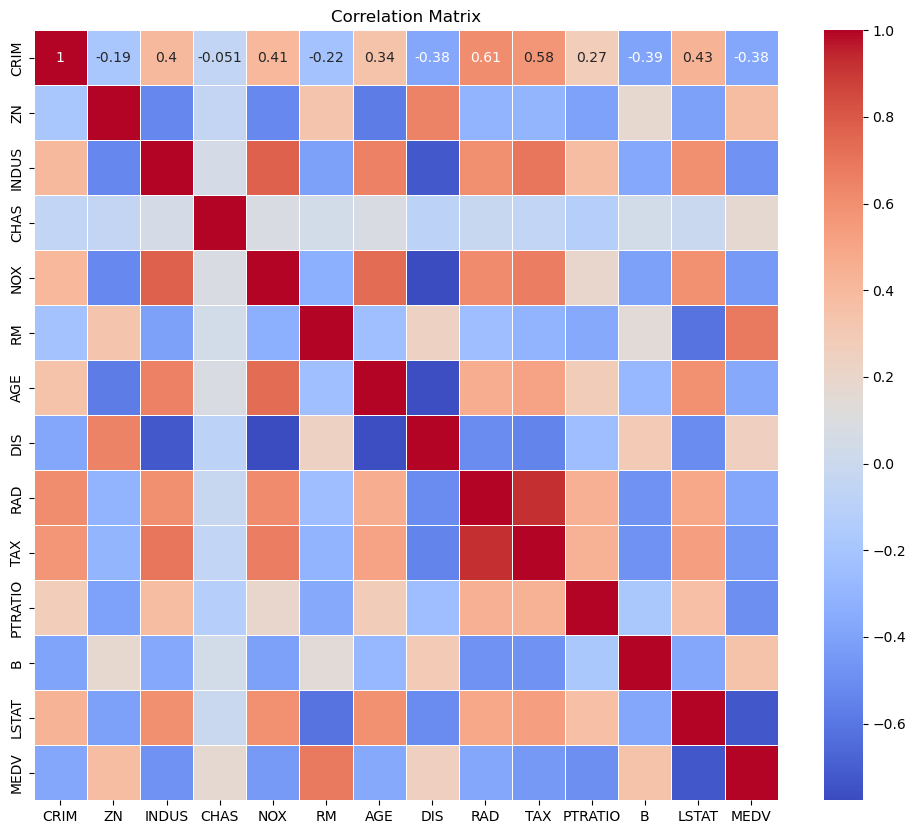

c:\Users\Stanley\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Stanley\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Stanley\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Stanley\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

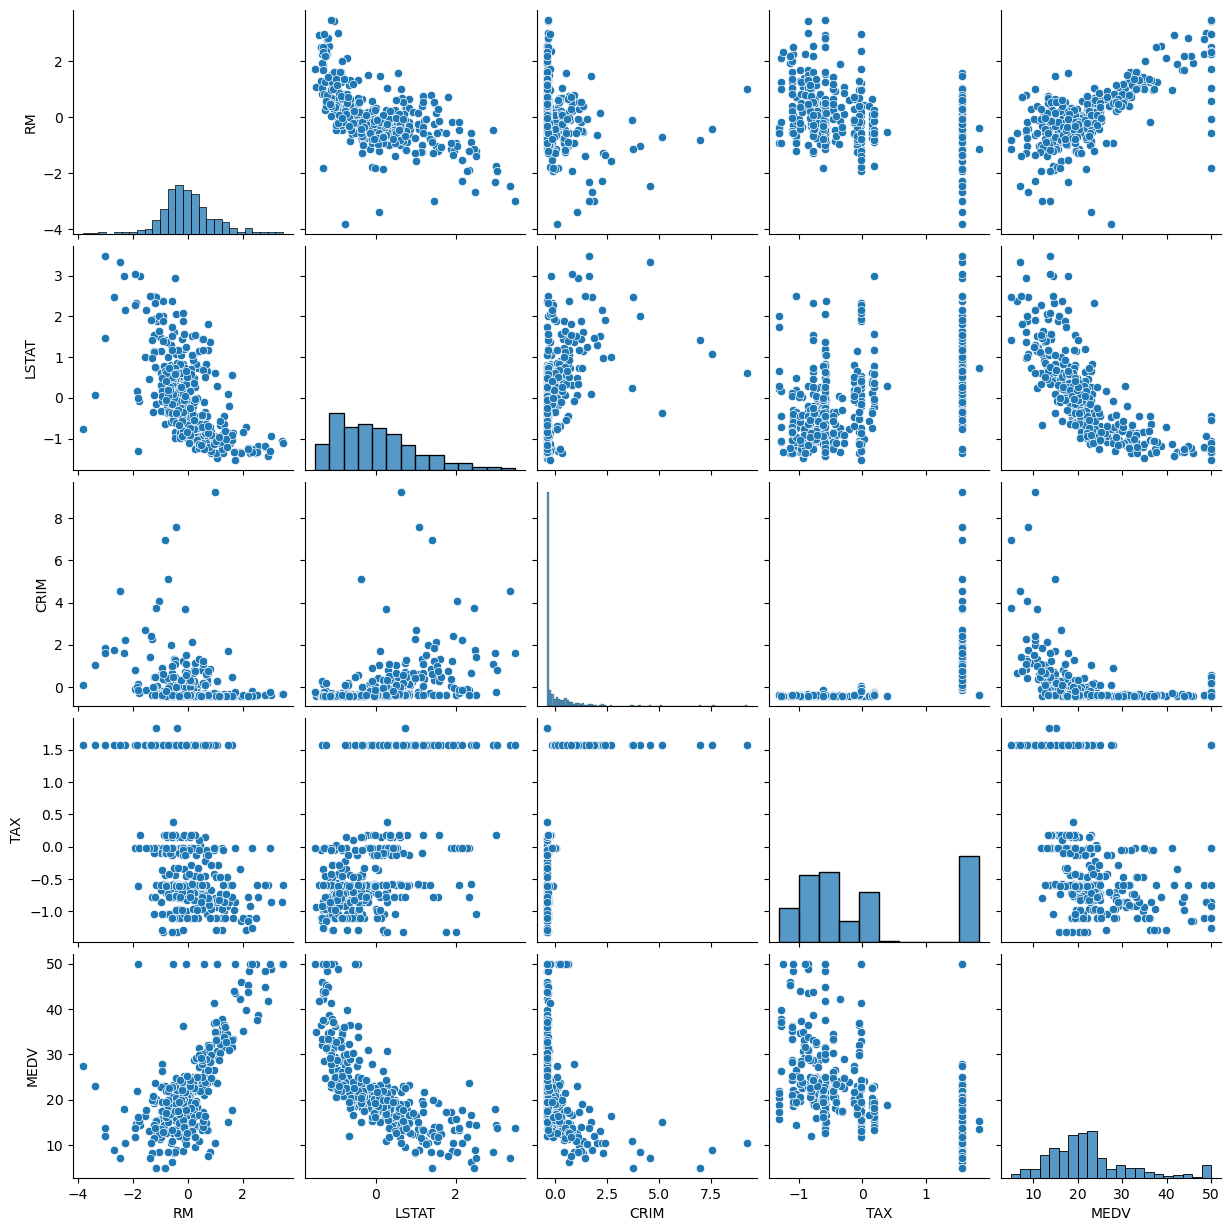

In [3]:
# Steps of Exploratory Data Analysis
# Create a DataFrame for better visualization
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
df_train = pd.DataFrame(train_features, columns=column_names)
df_train["MEDV"] = train_labels

# Display basic statistics of the dataset
print(df_train.describe())

# Correlation matrix to understand relationships between features
correlation_matrix = df_train.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Pairplot to visualize relationships between selected features
selected_features = ["RM", "LSTAT", "CRIM", "TAX", "MEDV"]
sns.pairplot(df_train[selected_features])
plt.show()


In [4]:
# Assuming you have defined train_features and train_labels

def build_model():
    model = Sequential([
        Dense(20, activation=tf.nn.relu, input_shape=[len(train_features[0])]),
        Dense(1)
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model


Train the model:

Training the neural network model requires the following steps:

Feed the training data to the model — the train_features and train_labels arrays.

The model learns to associate features and labels.

Ask the model to make predictions about a test dataset— the test_features array. 

We verify that the predictions match the labels from the test_labels array.

To start training, call the model.fit method — the model is "fit" to the training dataset

In [5]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')

model = build_model()
early_stop = EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split=0.1,
                    callbacks=[early_stop, PrintDot()])

# Create a DataFrame with the history
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show RMSE measure 
rmse_final = np.sqrt(hist['val_mse'].min())  # Taking the minimum validation MSE
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))

c:\Users\Stanley\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.......................Final Root Mean Square Error on validation set: 2.279


Now, let's plot the loss function measure on the training and validation sets. The validation set is used to prevent overfitting (learn more about it here). However, because our network is small, the training convergence without noticeably overfitting the data as the plot shows.

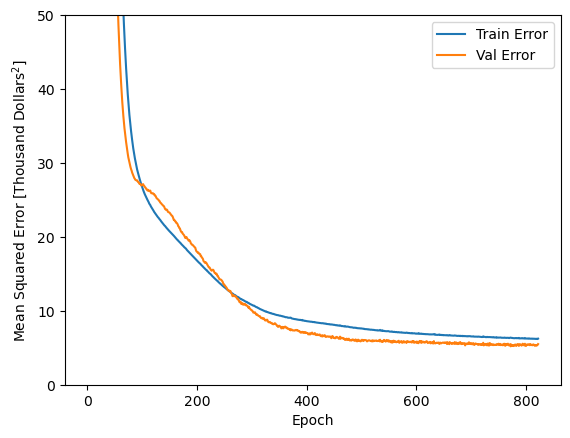

In [6]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')  
    plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')  
    plt.legend()
    plt.ylim([0, 50])

plot_history()
plt.show()  # This line is added to display the plot


Next, compare the model performance on the test dataset:

In [7]:
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on the test dataset: {}'.format(round(rmse, 3)))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.4884 - mae: 2.4253 - mse: 12.4884
Root Mean Square Error on the test dataset: 4.003


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


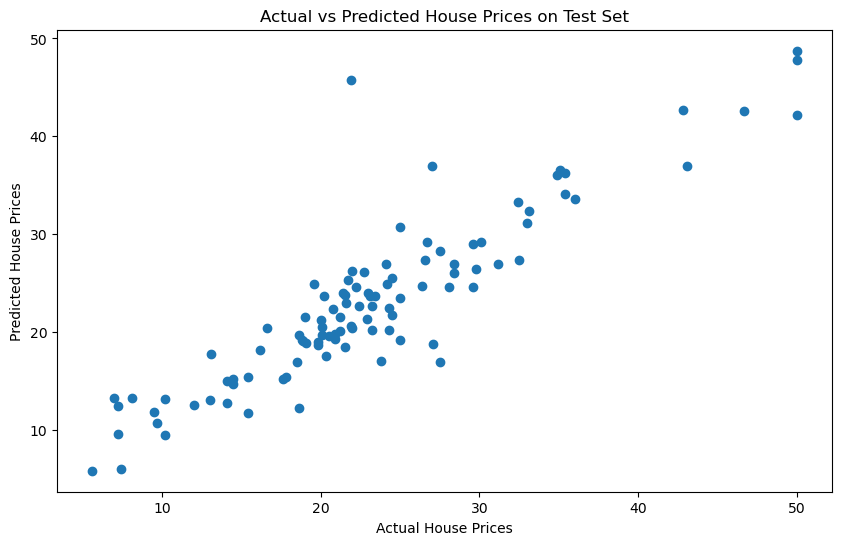

In [8]:
# Assuming you have already trained your model and have 'model' variable defined

# Normalize the test features using the mean and std from the training data
test_features_norm = (test_features - train_mean) / train_std

# Make predictions on the test set
predictions = model.predict(test_features_norm).flatten()

# Create a DataFrame for better visualization
df_test = pd.DataFrame(test_features, columns=column_names)
df_test["Actual"] = test_labels
df_test["Predicted"] = predictions

# Scatter plot of Actual vs Predicted house prices
plt.figure(figsize=(10, 6))
plt.scatter(df_test["Actual"], df_test["Predicted"])
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices on Test Set")
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


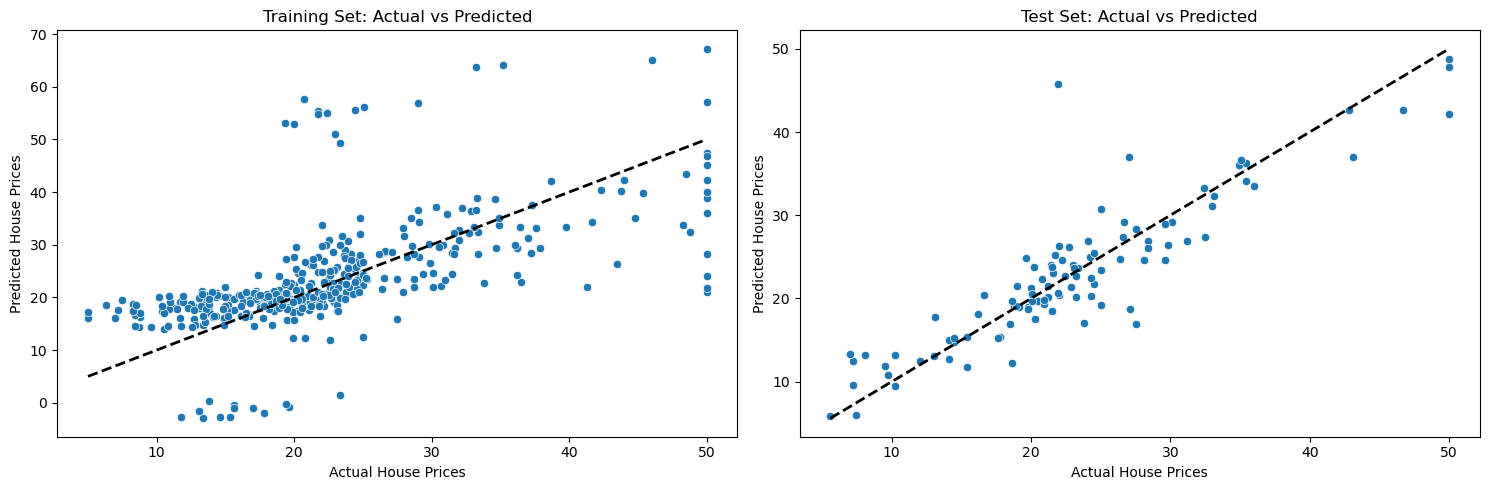

In [9]:
# Assuming you have already trained your model and have 'model' variable defined

# Normalize the datasets using the mean and std from the training data
train_features_norm = (train_features - train_mean) / train_std
test_features_norm = (test_features - train_mean) / train_std

# Make predictions on the datasets
train_predictions = model.predict(train_features_norm).flatten()
test_predictions = model.predict(test_features_norm).flatten()

# Create a DataFrame for better visualization
df_train = pd.DataFrame(train_features, columns=column_names)
df_train["Actual"] = train_labels
df_train["Predicted"] = train_predictions

df_test = pd.DataFrame(test_features, columns=column_names)
df_test["Actual"] = test_labels
df_test["Predicted"] = test_predictions

# Scatter plot with fitting line for the training set
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_train["Actual"], y=df_train["Predicted"])
plt.plot([df_train["Actual"].min(), df_train["Actual"].max()], [df_train["Actual"].min(), df_train["Actual"].max()], 'k--', lw=2)
plt.title("Training Set: Actual vs Predicted")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")

# Scatter plot with fitting line for the test set
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_test["Actual"], y=df_test["Predicted"])
plt.plot([df_test["Actual"].min(), df_test["Actual"].max()], [df_test["Actual"].min(), df_test["Actual"].max()], 'k--', lw=2)
plt.title("Test Set: Actual vs Predicted")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")

plt.tight_layout()
plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.3771 - mae: 1.6648 - mse: 5.3771 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

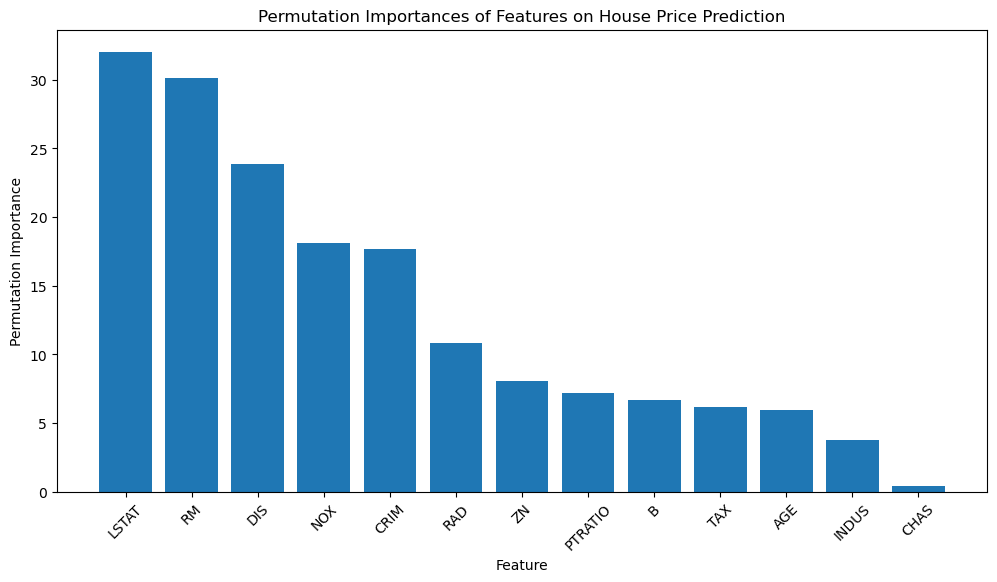

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.inspection import permutation_importance

# Assuming you have loaded the data and performed any necessary preprocessing

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

# Compute permutation importances
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42,  
                                         scoring="neg_mean_squared_error")

# Get feature names and importances
feature_names = column_names  # Assuming you have defined the column_names
importances = perm_importance.importances_mean

# Sort features based on importance
sorted_idx = np.argsort(importances)[::-1]

# Plot permutation importances
plt.figure(figsize=(12, 6))
plt.bar(range(X_test.shape[1]), importances[sorted_idx], align="center")
plt.xticks(range(X_test.shape[1]), np.array(feature_names)[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Permutation Importance")
plt.title("Permutation Importances of Features on House Price Prediction")
plt.show()
